# Image colorization

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras.api._v2.keras as K
from autoencoder import get_autoencoder
from deep_nn import get_dnet
from unet import get_unet
from resnet import get_resnet
from dense_net import get_dense_net
from unet_pix2pix import get_unet_p2p, get_unet_p2p_big

## Models

In [19]:
autoencoder = K.models.load_model("models/128x128/autoencoder/29") # get_autoencoder()
deep_nn = K.models.load_model("models/128x128/dnet/29") # get_dnet()
unet = get_unet()
resnet = get_resnet()
dense_net = get_dense_net()
unet_pix2pix = get_unet_p2p()

2023-02-17 12:30:42.034909: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-17 12:30:42.035369: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max


In [20]:
unet.load_weights("models/128x128/unet/29")
resnet.load_weights("models/128x128/resnet/29")
dense_net.load_weights("models/128x128/dense_net/29")
unet_pix2pix.load_weights("models/128x128/pix2pix-0.01/29/generator")

## Data

In [170]:
unet_upscale = get_unet_p2p_big(input_shape=(256,256,1))

In [190]:
unet_upscale.load_weights("models/pix2pix-0.01/best/generator")

In [2]:
print("loading 128x128")
print("0%")
with open('cache/128x128/X_train.npy', 'rb') as f:
    X_train_128 = np.load(f)
print("33%")
with open('cache/128x128/X_val.npy', 'rb') as f:
    X_val_128 = np.load(f)
print("66%")
with open('cache/128x128/X_test.npy', 'rb') as f:
    X_test_128 = np.load(f)
print("100%")

loading 128x128
0%
33%
66%
100%


In [10]:
print("loading 256x256")
print("0%")
with open('cache/X_train.npy', 'rb') as f:
    X_train_256 = np.load(f)
print("33%")
with open('cache/X_val.npy', 'rb') as f:
    X_val_256 = np.load(f)
print("66%")
with open('cache/X_test.npy', 'rb') as f:
    X_test_256 = np.load(f)
print("100%")

loading 256x256
0%
33%
66%
100%


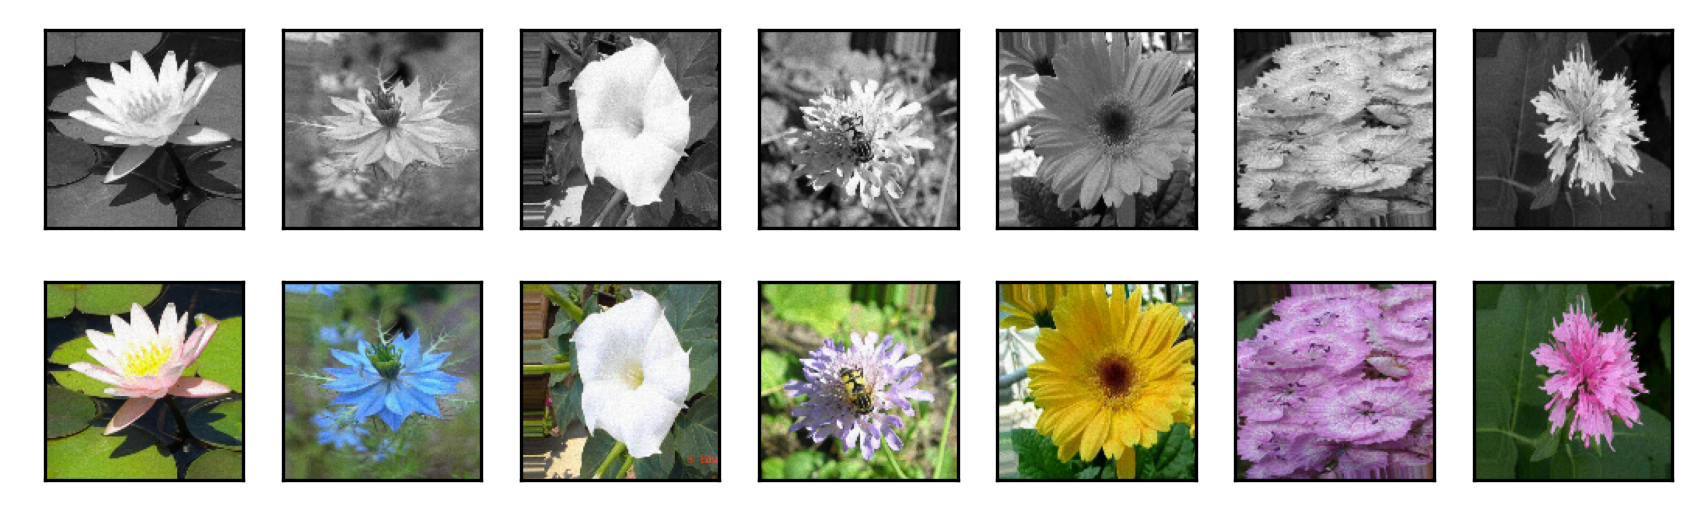

In [4]:
fig, axss = plt.subplots(2,7, figsize=(7,2), dpi=300)

for i in range(7):
    axss[0, i].imshow(X_test_128[i].mean(axis=-1), cmap="gray")
    axss[0, i].set_xticks([], [])
    axss[0, i].set_yticks([], [])
for i in range(7):
    axss[1, i].imshow(X_test_128[i].astype(int))
    axss[1, i].set_xticks([], [])
    axss[1, i].set_yticks([], [])

In [29]:
i = 10

([], [])

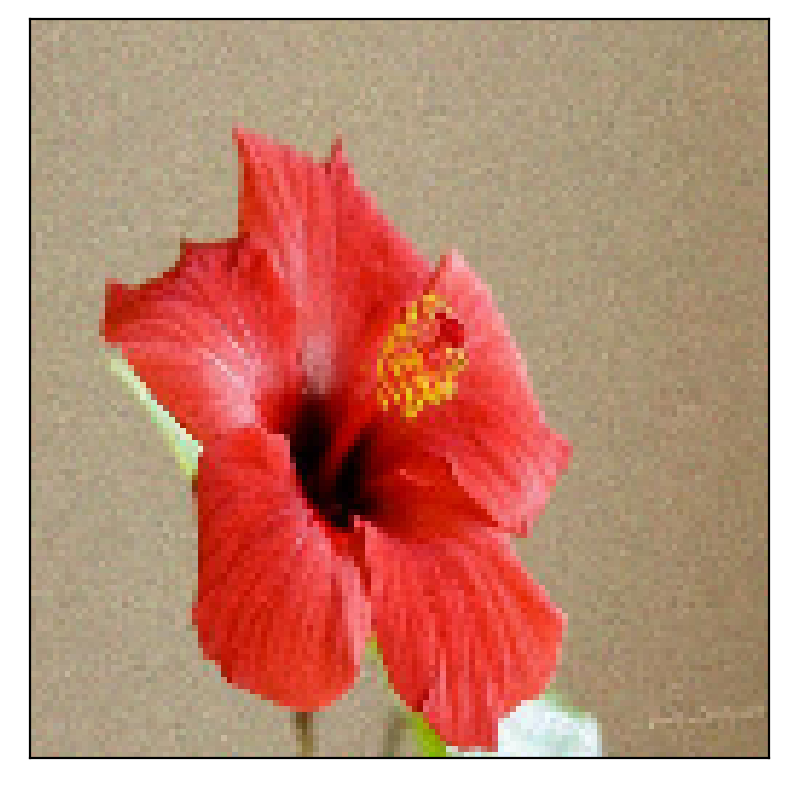

In [44]:
plt.figure(dpi=200)
plt.imshow(X_test_128[i].astype(int))
plt.xticks([], [])
plt.yticks([], [])

([], [])

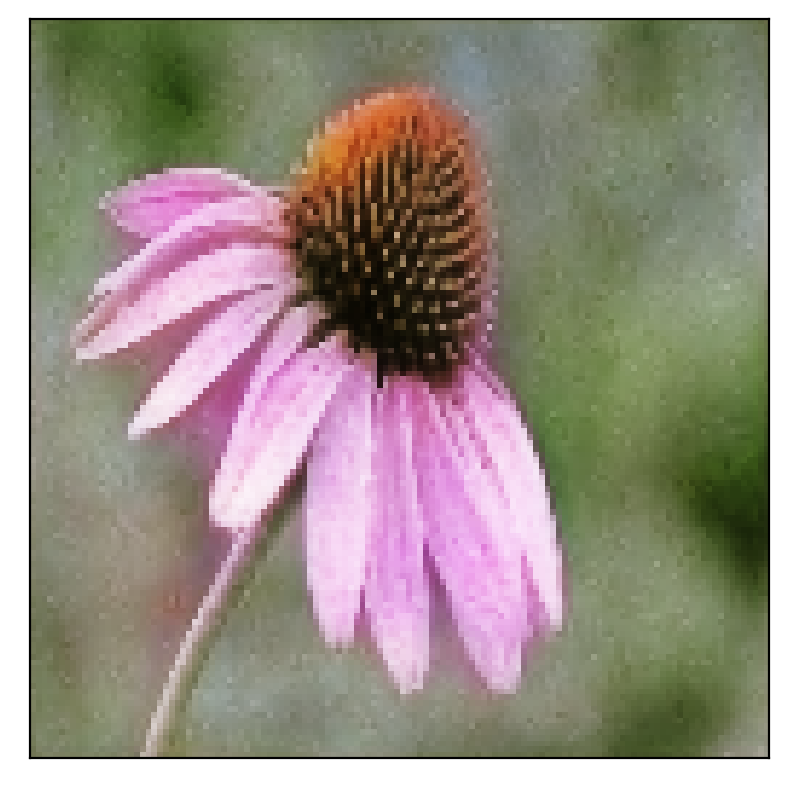

In [344]:
plt.figure(dpi=200)
i += 10
plt.imshow(unet(X_train_128[i][None,...].mean(axis=-1, keepdims=True))[0])
plt.xticks([], [])
plt.yticks([], [])

[]

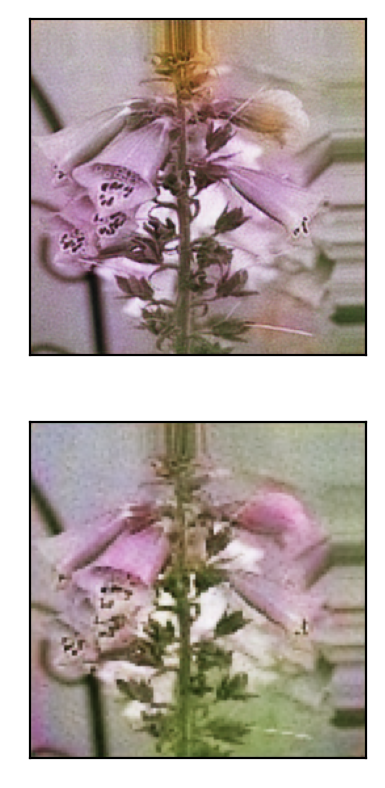

In [337]:
i += 1
fig, axs = plt.subplots(2, 1, dpi=200)
axs[0].imshow(unet_upscale(X_train_256[i][None,...].mean(axis=-1, keepdims=True))[0])
axs[0].set_xticks([], [])
axs[0].set_yticks([], [])
axs[1].imshow(unet_pix2pix(X_train_128[i][None,...].mean(axis=-1, keepdims=True))[0])
axs[1].set_xticks([], [])
axs[1].set_yticks([], [])

## Visualization

In [29]:
indexes = np.random.randint(0,len(X_test_128), 10)

0
1
2
3
4
5
6
7
8
9
finish


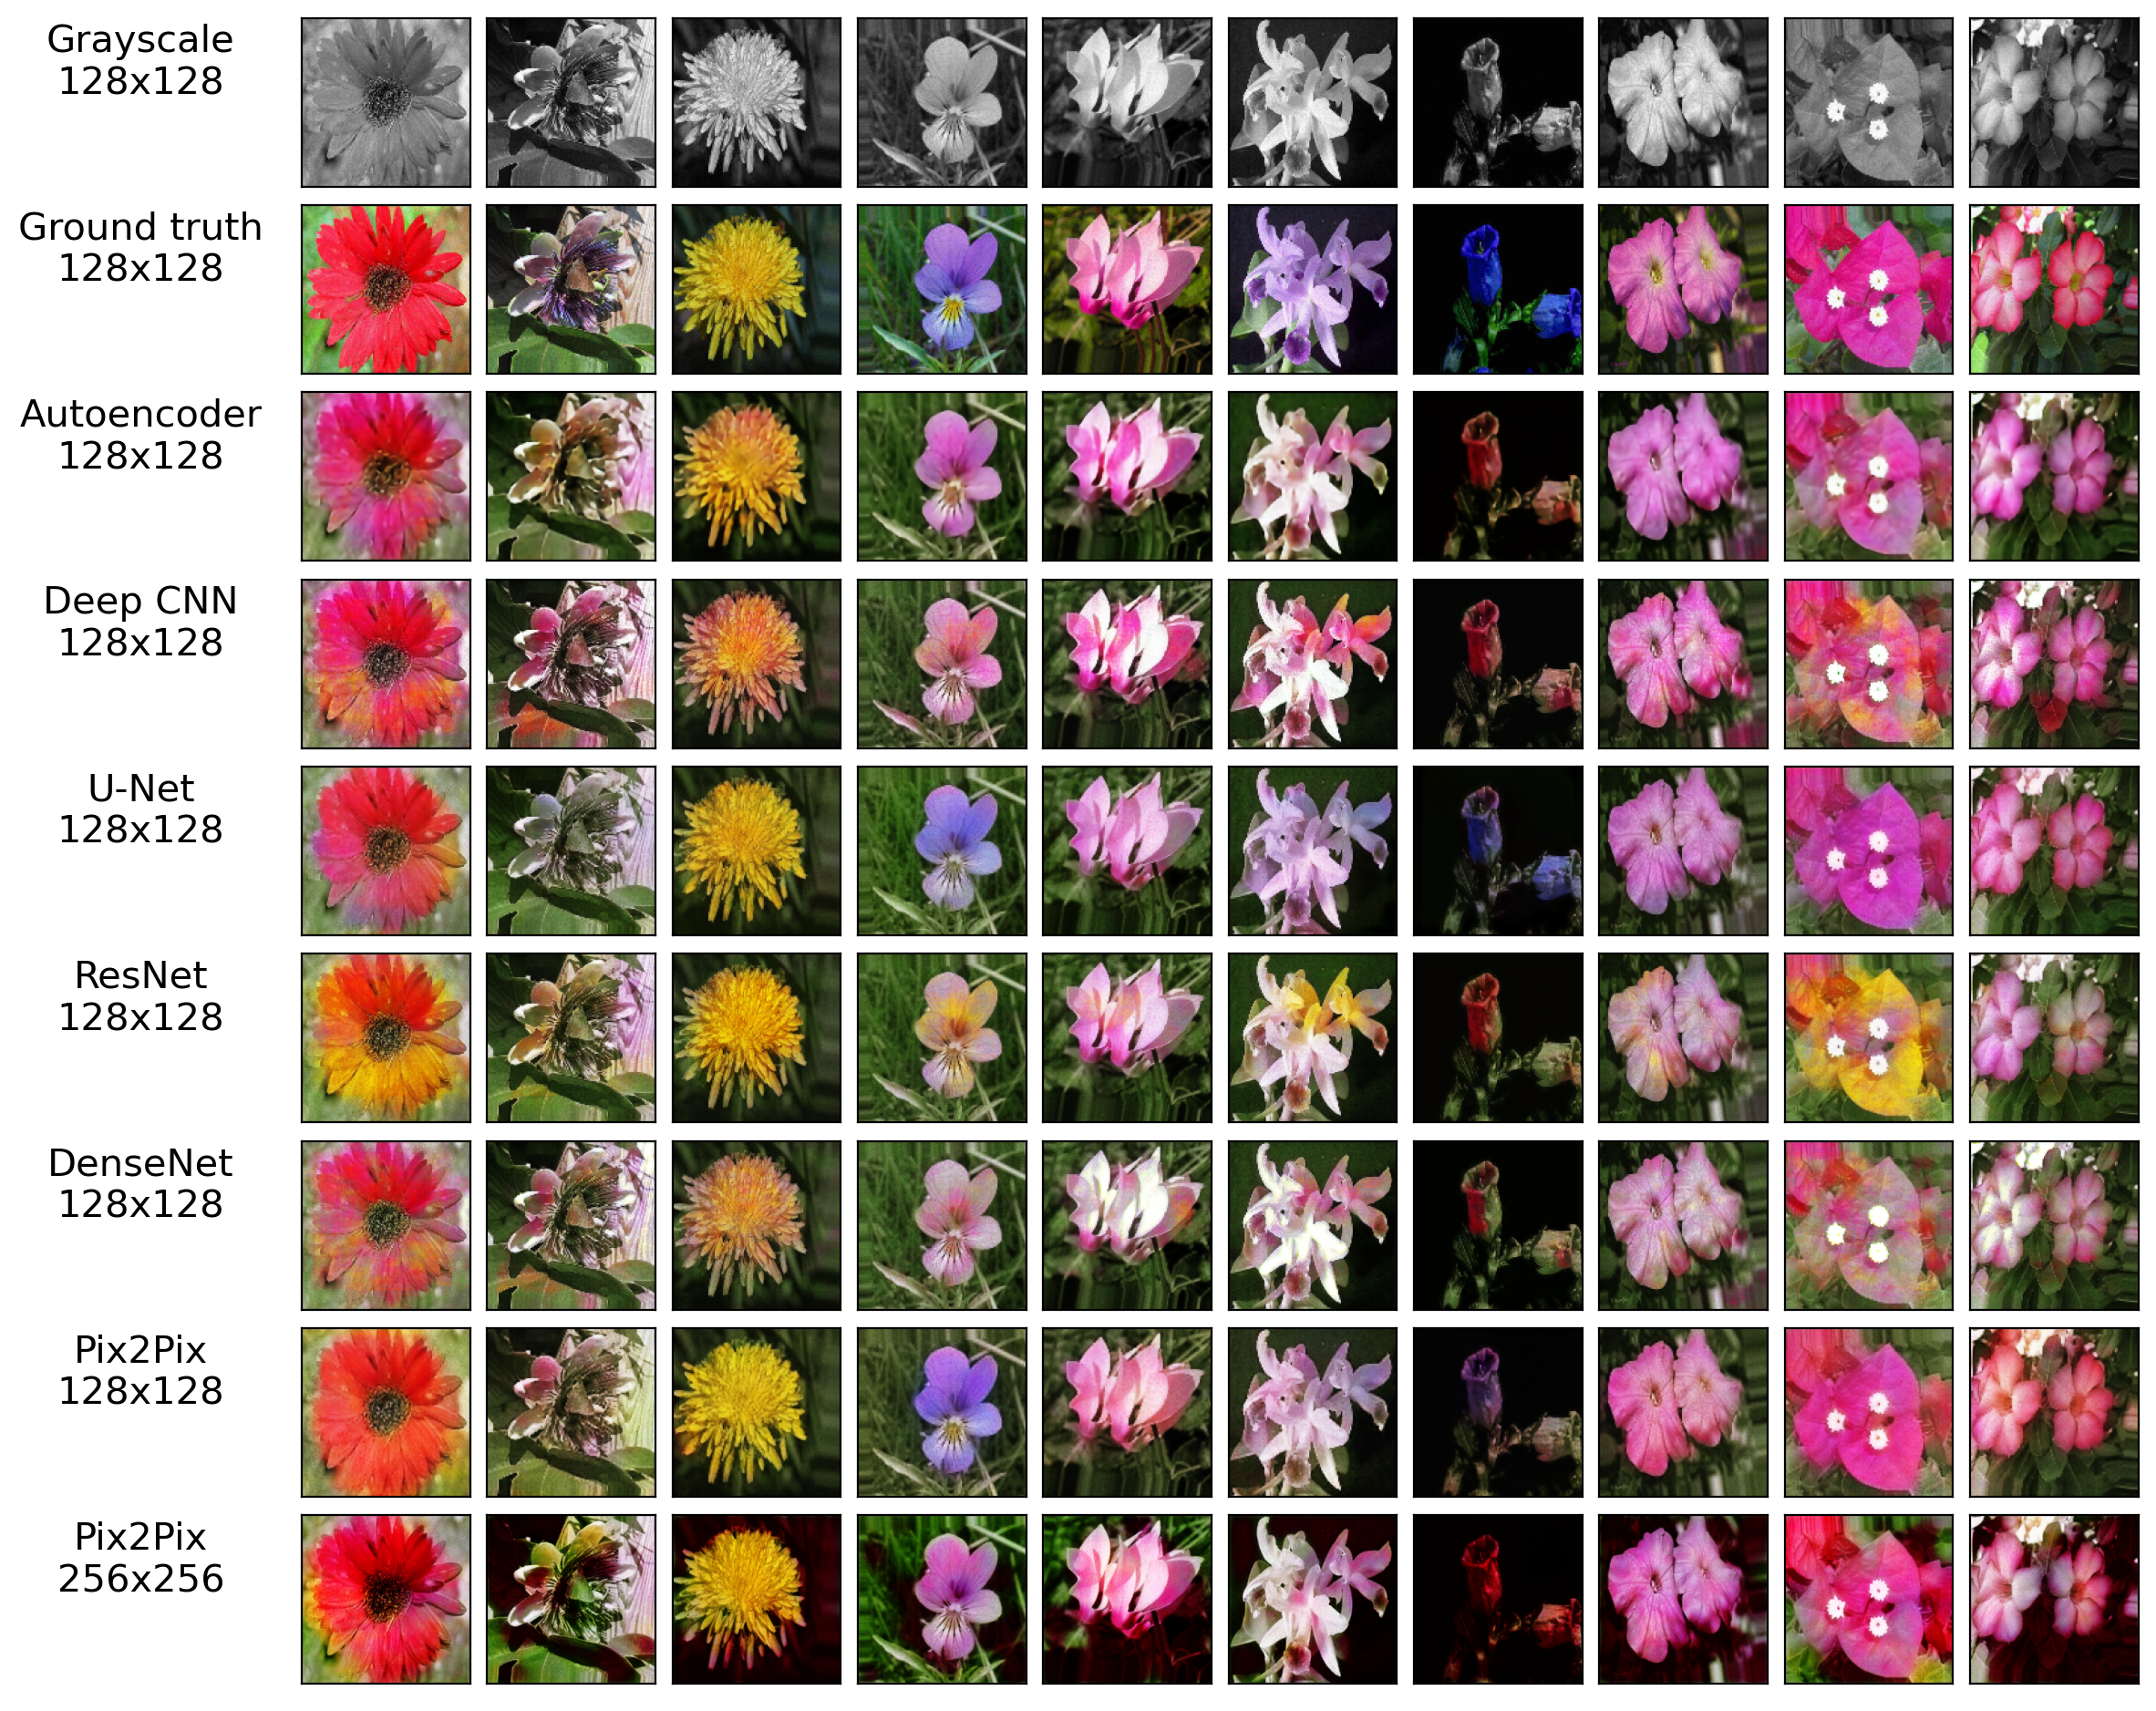

In [81]:
%matplotlib inline
fig, axs = plt.subplots(9, 10, figsize=(13,12), dpi=200)
for ax in axs.flatten():
    ax.set_yticks([], [])
    ax.set_xticks([], [])
axs[0, 0].set_ylabel("Grayscale\n128x128", rotation=0, fontsize=15, labelpad=60)
axs[1, 0].set_ylabel("Ground truth\n128x128", rotation=0, fontsize=15, labelpad=60)
axs[2, 0].set_ylabel("Autoencoder\n128x128", rotation=0, fontsize=15, labelpad=60)
axs[3, 0].set_ylabel("Deep CNN\n128x128", rotation=0, fontsize=15, labelpad=60)
axs[4, 0].set_ylabel("U-Net\n128x128", rotation=0, fontsize=15, labelpad=60)
axs[5, 0].set_ylabel("ResNet\n128x128", rotation=0, fontsize=15, labelpad=60)
axs[6, 0].set_ylabel("DenseNet\n128x128", rotation=0, fontsize=15, labelpad=60)
axs[7, 0].set_ylabel("Pix2Pix\n128x128", rotation=0, fontsize=15, labelpad=60)
axs[8, 0].set_ylabel("Pix2Pix\n256x256", rotation=0, fontsize=15, labelpad=60)
for i, index in enumerate(indexes):
    print(i)
    axs[0, i].imshow(X_test_128[index].mean(axis=-1, keepdims=True).astype(int), cmap="gray")
    axs[1, i].imshow(X_test_128[index].astype(int))
    axs[2, i].imshow(autoencoder(X_test_128[index][None,...].mean(axis=-1, keepdims=True))[0])
    axs[3, i].imshow(deep_nn(X_test_128[index][None,...].mean(axis=-1, keepdims=True))[0])
    axs[4, i].imshow(unet(X_test_128[index][None,...].mean(axis=-1, keepdims=True))[0])
    axs[5, i].imshow(resnet(X_test_128[index][None,...].mean(axis=-1, keepdims=True))[0])
    axs[6, i].imshow(dense_net(X_test_128[index][None,...].mean(axis=-1, keepdims=True))[0])
    axs[7, i].imshow(unet_pix2pix(X_test_128[index][None,...].mean(axis=-1, keepdims=True))[0])
    axs[8, i].imshow(unet_upscale(X_test_256[index][None,...].mean(axis=-1, keepdims=True))[0])

print("finish")
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()